## Imports

In [1]:
%matplotlib inline

import seaborn as sns
import numpy as np

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout, Reshape
from keras.layers.recurrent import LSTM
from keras.layers import Convolution2D, MaxPooling2D

Using TensorFlow backend.


## Constants

In [2]:
img_rows, img_cols = 28, 28
in_shape = (img_rows, img_cols, 1)
batch_size = 256
nb_epoch = 3

## Data

In [3]:
X_train = np.random.rand(10000, 28, 28, 1)
Y_train = np.random.rand(10000, 1)
X_test = np.random.rand(1000, 28, 28, 1)

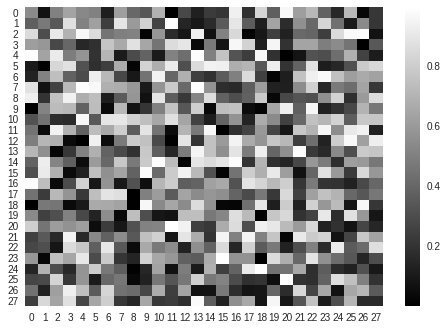

In [4]:
sns.heatmap(X_train[0].reshape(28,28), cmap='gray')

## Train Data

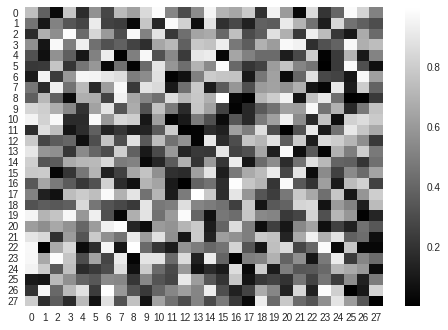

In [5]:
X_train = np.random.rand(10000, 28, 28, 1)
sns.heatmap(X_train[0].reshape(28, 28), cmap='gray')

In [6]:
Y_train = np.random.rand(10000, 1)
Y_train[0]

array([ 0.82518058])

## Test Data

In [7]:
X_test = np.random.rand(1024, 28, 28, 1)

# Model

In [8]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu', input_shape=in_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

In [9]:
model.add(Reshape((1, -1)))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 28, 28, 32)    320         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 14, 14, 32)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 14, 14, 64)    18496       maxpooling2d_1[0][0]             
____________________________________________________________________________________________________
maxpooling2d_2 (MaxPooling2D)    (None, 7, 7, 64)      0           convolution2d_2[0][0]            
___________________________________________________________________________________________

## Train model
I think it is just learning to output .5 to minimize loss as we are using completely random training data

In [36]:
model.fit(X_train, Y_train, # specify training data
          batch_size=batch_size, # use this many images per mini-batch - memory dependent - 256
          nb_epoch=100, # go through my training data this number of times - 3
          shuffle=False,
          verbose=True # please print things 
         )

Epoch 1/100
10000/10000 [==============================] - 0s - loss: 0.0038     
Epoch 2/100
10000/10000 [==============================] - 0s - loss: 0.0037     
Epoch 3/100
10000/10000 [==============================] - 0s - loss: 0.0035     
Epoch 4/100
10000/10000 [==============================] - 0s - loss: 0.0035     
Epoch 5/100
10000/10000 [==============================] - 0s - loss: 0.0038     
Epoch 6/100
10000/10000 [==============================] - 0s - loss: 0.0040     
Epoch 7/100
10000/10000 [==============================] - 0s - loss: 0.0043     
Epoch 8/100
10000/10000 [==============================] - 0s - loss: 0.0042     
Epoch 9/100
10000/10000 [==============================] - 0s - loss: 0.0040     
Epoch 10/100
10000/10000 [==============================] - 0s - loss: 0.0041     
Epoch 11/100
10000/10000 [==============================] - 0s - loss: 0.0045     
Epoch 12/100
10000/10000 [==============================] - 0s - loss: 0.0045     
Epoch 13/100


### Predictions

In [37]:
predictions = model.predict(X_test)

In [38]:
predictions.mean()

0.45520064

In [39]:
Y_train.mean()

0.50140521035392893